# I-24 MOTION Tutorial

# Virtual trajectories for I-24 MOTION: data and tools


I am Junyi (visit www.jijunyi.com for more) from Vanderbilt University, a second-year Ph.D. student.

In this session, I will guide you through:
 1. how to generate macroscopic mean speed from the raw data?
2. how to smooth and interpolate the macroscopic data based on Adaptive Smoothing Method?
3. how to use the macroscopic speed field to generate virtual trajectories?

All the details of this session can be found at our Virtual Trajectory paper. 

***Ji, J., Wang, Y., Gloudemans, D., Zachár, G., Barbour, W., & Work, D. B. (2023). Virtual trajectories for I-24 MOTION: data and tools. arXiv preprint arXiv:2311.10888.***

<img src="figures/4lane_w_vts.png" width="1800"/>

# Part 1: how to generate the macrosopic mean speed field?

In [1]:
from macro_data_processing import get_speed_mean_field
from macro_data_processing import convert_to_cst_unix
starttime = convert_to_cst_unix('2022-11-22 07:20')
endtime = convert_to_cst_unix('2022-11-22 07:30')
input_filename = "data/INCEPTION.22-11-22.tutorial.json"
# dx and dt are the size of edie's box
dx = 0.02
dt = 4
lane_number = 1
speed_raw = get_speed_mean_field(input_filename, dx, dt, starttime, endtime, lane_number)

/Users/jjworklab/Desktop/23Fall/Tutorial/macro_data_processing.py:140: RuntimeWarning: invalid value encountered in divide
  speed_raw = pd.DataFrame(matrix_to_coordinates(3600 * TTD_matrix / TTT_matrix))


L. C. Edie et al., Discussion of traffic stream measurements and definitions. Port of New York Authority New York, 1963

Z. He, Y. Lv, L. Lu, and W. Guan, Constructing spatiotemporal speed contour diagrams: using rectangular or non-rectangular parallelogram cells? Transportmetrica B: transport dynamics, 2017

Treiber, M. Traffic dynamics and simulation, Class Slides: https://www.mtreiber.de/Vkmod/index.html, Lecture 1, 2023

<img src="figures/diamond_edie.png" alt="Diamond Edie" width="2000"/>

In [2]:
from visualization import visualize_heatmap

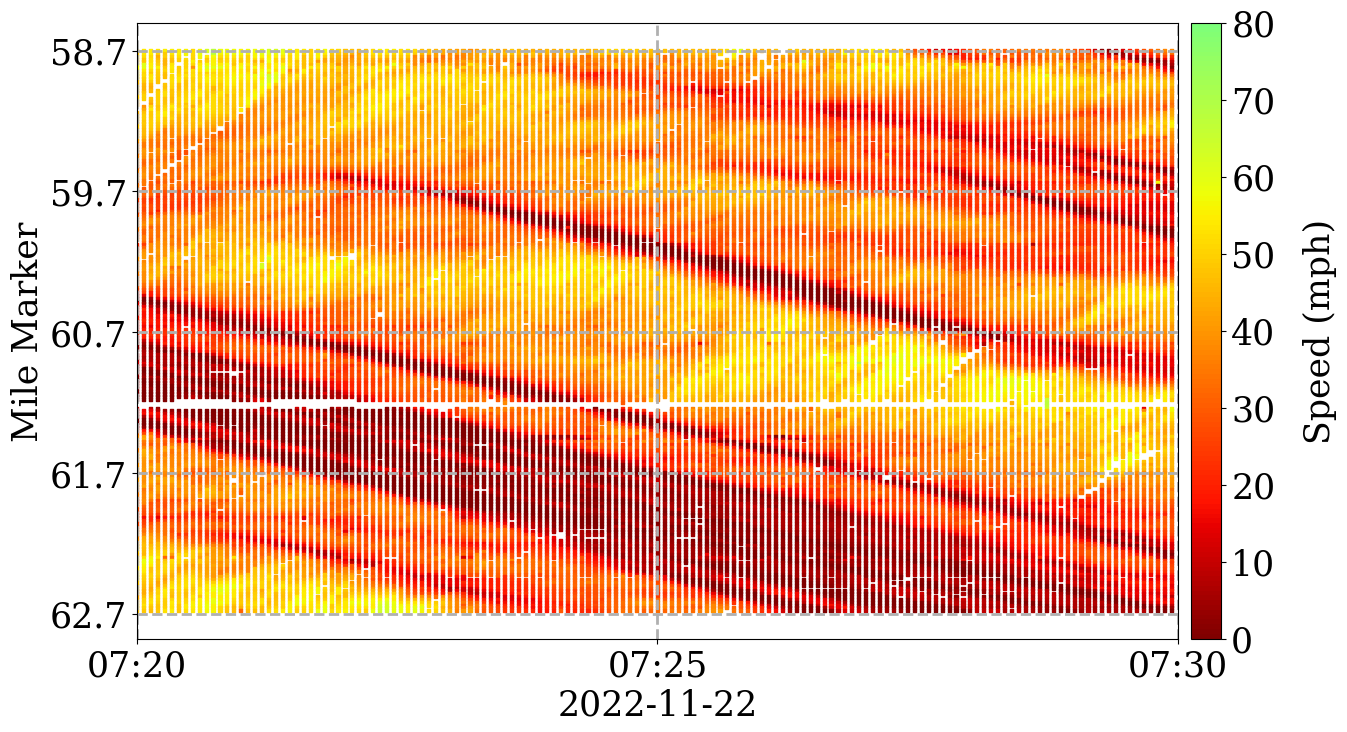

In [3]:
visualize_heatmap(speed_raw, starttime, endtime, dx, dt, fig_width=16, fig_height=8, minor_xtick = int(300/dt))

# Part 2: how to smooth and interpolate the macroscopic data based on ASM?

### ASM (adaptive smoothing method)

In [4]:
from ASM import smooth_raw_data

In [5]:
smooth_speed = smooth_raw_data(speed_raw,dx,dt)

M. Treiber, A. Kesting, and R. E. Wilson, Reconstructing the traffic state by fusion of heterogeneous data, Computer-Aided Civil and Infrastructure Engineering, vol. 26, no. 6, pp. 408–419, 2011.

<img src="figures/ASM.png" alt="ASM" width="1000"/>

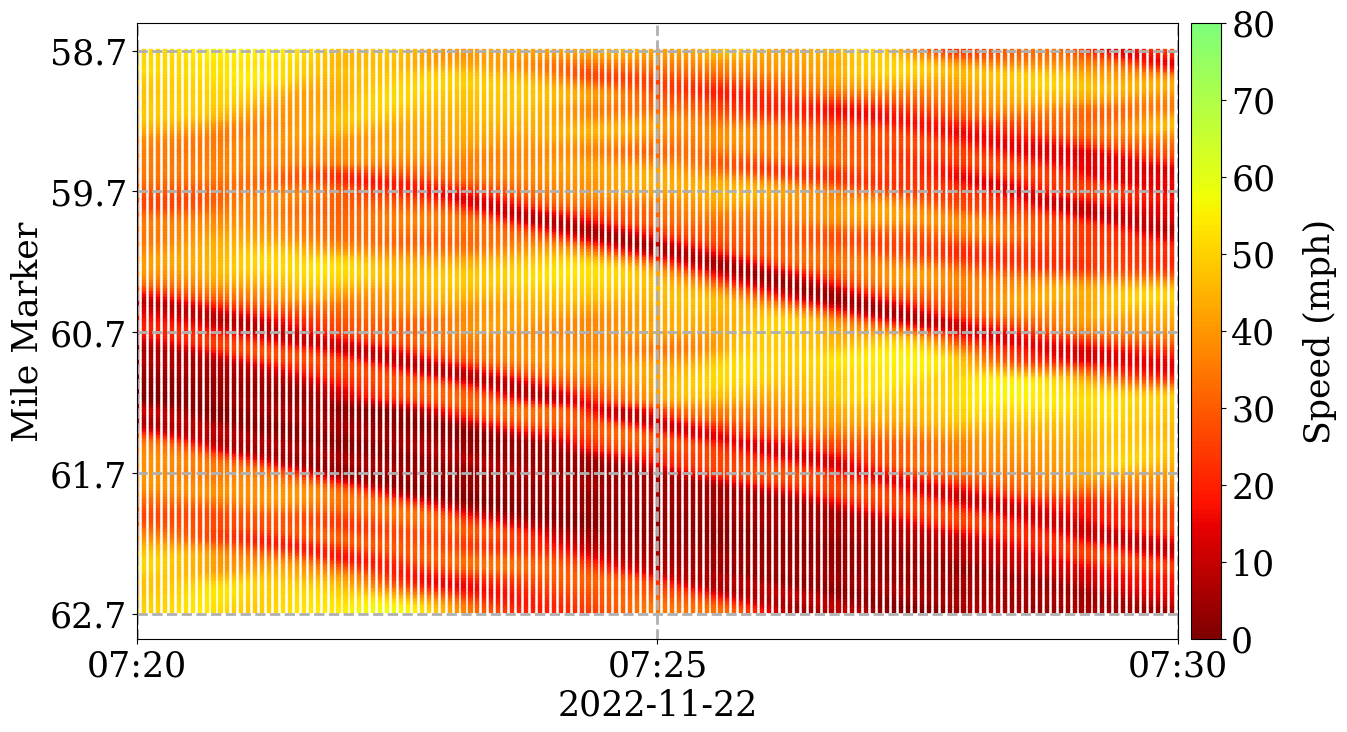

In [6]:
visualize_heatmap(smooth_speed, starttime, endtime, dx, dt, fig_width=16, fig_height=8, minor_xtick = int(300/dt))

# Part 3: how to use the marcoscopic speed field to generate VTs?

# A standard approach to generate trajectories from a macroscopic speed field is to calculate the position p(t) of a vehicle assuming the velocity dynamics of the vehicle are computed as follows:
<img src="figures/VTEQ.png" alt="ASM" width="500"/>

In [7]:
from VT import gen_VT_k
vt = gen_VT_k(smooth_speed, k=1)

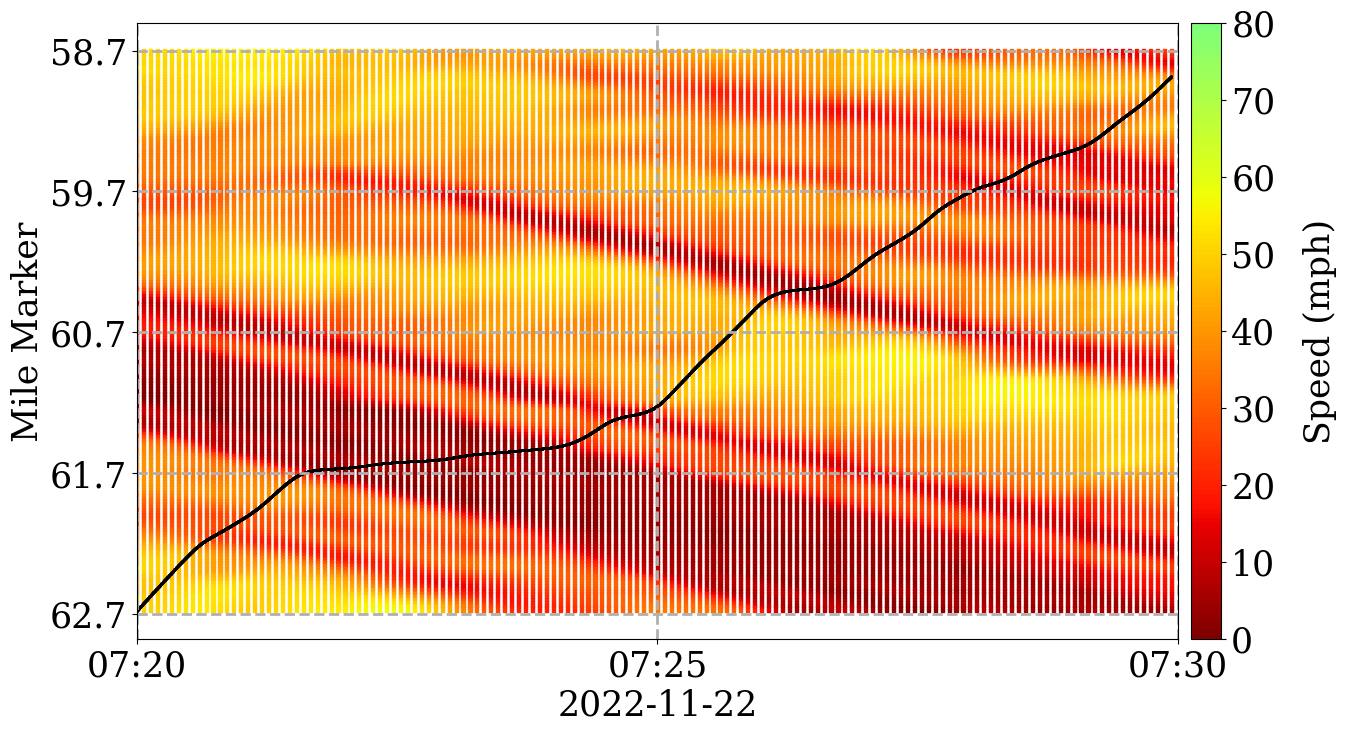

In [8]:
from visualization import visualize_heatmap_vt
visualize_heatmap_vt(smooth_speed, vt, starttime, endtime, dx, dt, fig_width=16, fig_height=8, minor_xtick = int(300/dt))

More data and analysis... ***Ji, J., Wang, Y., Gloudemans, D., Zachár, G., Barbour, W., & Work, D. B. (2023). Virtual trajectories for I-24 MOTION: data and tools. arXiv preprint arXiv:2311.10888.***
<img src="figures/4lane_w_vts.png" width="1800"/>